# Dust Extinction in IC 5146

It is well established that dust particles in the interstellar medium (ISM) absorb and scatter light from celestial objects in a highly selective manner, particularly affecting the UV wavelengths. Dust extinction is defined as $A_\lambda = 2.5 \log_{10}(F_{0,\lambda}/F_\lambda)$, where $F_{0,\lambda}$ and $F_\lambda$ are the intrinsic and observed fluxes. The optical depth is simply $\tau_\lambda = A_{\lambda}/1.086$.

Extinction is often expressed as function of the color excess (or reddening) $E(B-V) = (B-V)_{\text{observed}} - (B-V)_{\text{intrinsic}}$ and of the extinction curve $k(\lambda)$:

$$A_\lambda = k(\lambda)\,E(B-V)$$

Reddening is a measure of the column density of dust, while the extinction curve speaks of microphyisics of dust absorption. This last is often parametrized by the total-to-selective extinction ratio $R_V = A_V/(A_B-A_V) = A_V/E(B-V)$. Typical values in the Milky Way are $R_V\sim 3.1$, but they can range between 2 and 6 depending on the environmental conditions and dust composition. The amount of dust itself does not directly determine $R_V$, but denser environments (e.g., molecular clouds) are associated with grain growth (e.g., coagulation), which leads to larger average grain sizes and thus higher $R_V$​ values. 

- Diffuse ISM: Typical $R_V\sim 3.1$, associated with small grains. Steep extinction curves, small grains effective at absorbing blue/UV
- Dense Clouds: Larger grains dominate due to coagulation or icy mantles, leading to $R_V\sim 4−6$. Flatter extinction curves, large grains effective at absorbing red/IR. Very large grains would produce gray extinction with $R_V \rightarrow \infty$.
- Star-forming Regions: High radiation fields can destroy small grains, increasing $R_V$.
- Rayleigh scattering ($A_\lambda \propto \lambda^{−4}$) would produce very steep extinction with $R_V \sim 1.2$.

The two most popular extinction curves in literature are the Cardelli, Clayton, and Mathis (1989) (CCM89) and the Calzetti (2000). CCM89 is primarily applied to older stellar populations and general interstellar dust in galaxies like the Milky Way. It shows a characteristic decrease in extinction with increasing wavelength, with a steep rise in UV extinction. Calzetti law instead provides a model for the extinction of light in galaxies with ongoing star formation, like the Milky Way and other active star-forming galaxies. It shows more extinction in the ultraviolet (UV) range than in optical and infrared, which is typical for young stellar populations.


| **Feature**           | **Cardelli (CCM89)**                  | **Calzetti**                                |
|------------------------|---------------------------------------|---------------------------------------------|
| **Context**           | Milky Way extinction (ISM dust)       | Dust attenuation in starburst galaxies      |
| **Focus**             | Extinction of individual stars        | Attenuation of galaxy-wide light            |
| **2175 Å bump**       | Prominent                            | Weak or absent                              |
| **UV Behavior**       | Moderate UV extinction               | Stronger UV attenuation                     |
| **Geometry Considered**| Uniform dust-screen model            | Complex dust-star geometry                  |

Dust models we will consider are a mixture of carbonaceous grains and amorphous silicate grains. Carbonaceous grains are PAH (Polycyclic Aromatic Hydrocarbons)-like when small, and graphite-like when large (see Li & Draine 2001).



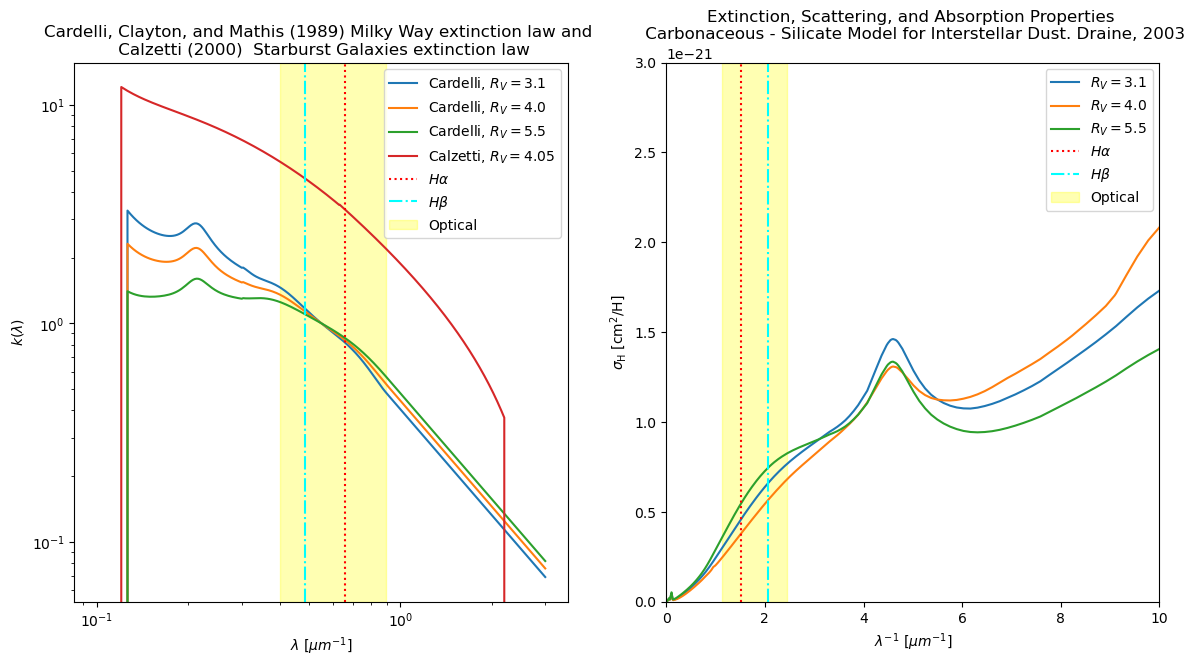

k(Ha) = 0.82 (Cardelli), 3.33 (Calzetti)
k(Hb) = 1.16 (Cardelli), 4.60 (Calzetti)


In [57]:
import matplotlib.pyplot as plt
import numpy as np

def ccm_extinction(wavelength, R_V=3.1):
    """
    Compute the CCM extinction curve k(λ) as a function of wavelength.
    
    Parameters:
        wavelength : float or numpy array
            Wavelength(s) in microns (µm).
        R_V : float
            Total-to-selective extinction ratio (default is 3.1).
    
    Returns:
        k_lambda : float or numpy array
            The extinction curve k(λ) = A(λ) / E(B-V).
    """
    wavelength = np.atleast_1d(wavelength)
    x = 1.0 / wavelength  # Convert wavelength to inverse microns
    k_lambda = np.zeros_like(x)

    # Infrared (x < 1.1 μm⁻¹)
    mask_ir = (x >= 0.3) & (x < 1.1)
    k_lambda[mask_ir] = 0.574 * x[mask_ir]**1.61 - 0.527 * x[mask_ir]**1.61 / R_V

    # Optical-NIR (1.1 ≤ x < 3.3 μm⁻¹)
    mask_opt = (x >= 1.1) & (x < 3.3)
    y = x - 1.82
    a_nuv = (
        1 + 0.17699 * y - 0.50447 * y**2 - 0.02427 * y**3 +
        0.72085 * y**4 + 0.01979 * y**5 - 0.77530 * y**6 + 0.32999 * y**7
    )
    b_nuv = (
        1.41338 * y + 2.28305 * y**2 + 1.07233 * y**3 - 5.38434 * y**4 -
        0.62251 * y**5 + 5.30260 * y**6 - 2.09002 * y**7
    )
    k_lambda[mask_opt] = a_nuv[mask_opt] + b_nuv[mask_opt] / R_V


    # UV and Far-UV (3.3 ≤ x ≤ 8 μm⁻¹)
    mask_fuv = (x >= 3.3) & (x <= 8.0)

    # Add Drude bump for x > 5.9
    F_a = np.where(x < 5.9, 0, -0.04473*(x-5.9)**2 - 0.009779*(x-5.9)**3)
    F_b = np.where(x < 5.9, 0, 0.2130*(x-5.9)**2 + 0.1207*(x-5.9)**3)
    
    a_fuv = (
        1.752 - 0.316 * x - 0.104 / ((x - 4.67)**2 + 0.341) + F_a
    )
    b_fuv = (
        -3.090 + 1.825 * x + 1.206 / ((x - 4.67)**2 + 0.341) + F_b
    )
    k_lambda[mask_fuv] = a_fuv[mask_fuv] + b_fuv[mask_fuv] / R_V

    return k_lambda[0] if wavelength.size == 1 else k_lambda


def calzetti_extinction(wavelength, R_V=4.05):
    """
    Compute the Calzetti attenuation curve k(λ) as a function of wavelength.
    
    Parameters:
        wavelength : float or numpy array
            Wavelength(s) in microns (µm).
        R_V : float
            Total-to-selective extinction ratio (default is 4.05).
    
    Returns:
        k_lambda : float or numpy array
            The attenuation curve k(λ) = A(λ) / E(B-V)_stars.
    """
    wavelength = np.atleast_1d(wavelength)
    k_lambda = np.zeros_like(wavelength)
    
    # UV to optical: 0.12 µm ≤ λ < 0.63 µm
    uv_opt_mask = (wavelength >= 0.12) & (wavelength < 0.63)
    lambda_uv_opt = wavelength[uv_opt_mask]
    k_lambda[uv_opt_mask] = (
        2.659 * (-2.156 + 1.509 / lambda_uv_opt - 0.198 / lambda_uv_opt**2 + 0.011 / lambda_uv_opt**3) + R_V
    )
    
    # Optical to NIR: 0.63 µm ≤ λ ≤ 2.2 µm
    opt_nir_mask = (wavelength >= 0.63) & (wavelength <= 2.2)
    lambda_opt_nir = wavelength[opt_nir_mask]
    k_lambda[opt_nir_mask] = (
        2.659 * (-1.857 + 1.040 / lambda_opt_nir) + R_V
    )

    return k_lambda[0] if wavelength.size == 1 else k_lambda

# Fitzpatrick DUST EXTINCTION 
# https://www.astro.princeton.edu/~draine/dust/extcurvs/kext_albedo_WD_MW_3.1_60_D03.all

import os
from scipy.interpolate import interp1d

dust_extinction = {}
R_V = ['3.1','4.0','5.5']

for i,filename in enumerate(os.listdir('dust_models')):
    if filename.endswith('.all'):  # Only process .all files
        file_path = os.path.join('dust_models', filename)

        # Initialize lists for lambda and C_ext/H
        lambda_values = []
        C_ext_H_values = []

        with open(file_path, "r") as file:
            lines = file.readlines()
            for line in lines[80:]:  # Start reading from the 80th line
                columns = line.split()
                if len(columns) >= 4:
                    try:
                        # Extract lambda and C_ext/H values
                        lambda_values.append(float(columns[0]))  
                        C_ext_H_values.append(float(columns[3]))  
                        
                    except ValueError:
                        continue
        
        # interpolate
        extinction_H_curve = interp1d(lambda_values,C_ext_H_values)
        
        # Add the data to the dictionary with the filename as key
        dust_extinction[R_V[i]] = {
            'lambda': lambda_values,
            'extinction_H_curve': extinction_H_curve
        }


fig, ax = plt.subplots(1,2,figsize=(14,7))

w = np.linspace(0.1, 3, 1000)
ax[0].plot(w, ccm_extinction(w), label='Cardelli, $R_V=3.1$')
ax[0].plot(w, ccm_extinction(w,R_V = 4.0), label='Cardelli, $R_V=4.0$')
ax[0].plot(w, ccm_extinction(w,R_V = 5.5), label='Cardelli, $R_V=5.5$')
ax[0].plot(w, calzetti_extinction(w), label='Calzetti, $R_V=4.05$')

ax[0].set(xscale = "log", yscale= "log", xlabel = "$\lambda$ [$\mu m^{-1}$]", ylabel = "$k(\lambda$)")

wavelength_Ha = 656.281e-7    # Ha line (cm)
wavelength_Hb = 486.135e-7    # Hb line (cm)

ax[0].axvline(x=wavelength_Ha * 1e4, color='red', linestyle=':', label='$H\\alpha$')
ax[0].axvline(x=wavelength_Hb * 1e4, color='cyan', linestyle='-.', label='$H\\beta$')

y_min, y_max = ax[0].get_ylim()
ax[0].set_ylim(y_min,y_max)
ax[0].fill_between(w, y_min, y_max, where=(w >= 0.4) & (w <= 0.9),
                color='yellow', alpha=0.3, label="Optical")

ax[0].legend()
ax[0].set_title("Cardelli, Clayton, and Mathis (1989) Milky Way extinction law and \n Calzetti (2000)  Starburst Galaxies extinction law")

for rv in R_V:

    w = np.array(dust_extinction[rv]['lambda'])
    ax[1].plot(1/w, dust_extinction[rv]['extinction_H_curve'](w),label=f"$R_V = ${rv}")

ax[1].axvline(x = 1/(wavelength_Ha*1e4),c='red',linestyle=':',label='$H\\alpha$')
ax[1].axvline(x = 1/(wavelength_Hb*1e4),c='cyan',linestyle='-.',label='$H\\beta$')

ax[1].fill_between(1/w, 0, 3e-21, where=(1/w <= 1/0.4) & (1/w >= 1/0.9),
                 color='yellow', alpha=0.3, label="Optical")

ax[1].set(xlim=(0, 10), ylim=(0, 30e-22),
           xlabel="$\\lambda^{-1}$ [$\\mu m^{-1}$]", ylabel="$\\sigma_\\text{H}$ [$\\mathrm{cm^2 / H}$]")
ax[1].legend()
ax[1].set_title("Extinction, Scattering, and Absorption Properties \n Carbonaceous - Silicate Model for Interstellar Dust. Draine, 2003")


plt.show()

print(f"k(Ha) = {ccm_extinction(wavelength_Ha*1e4):.2f} (Cardelli), {calzetti_extinction(wavelength_Ha*1e4):.2f} (Calzetti)")
print(f"k(Hb) = {ccm_extinction(wavelength_Hb*1e4):.2f} (Cardelli), {calzetti_extinction(wavelength_Hb*1e4):.2f} (Calzetti)")


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
from astropy.io import fits

filter = ['Ha', 'Hb', 'g', 'r', 'i']
file_paths = {f: f'data/cleaned_calibrated/{f}_calibrated.fit' for f in filter}
filter_cmap = {'Ha': 'hot','Hb': 'magma','g': 'bone','r': 'hot','i': 'copper'}
image = {}
sigma = {}

for f in filter:
    with fits.open(file_paths[f]) as hdul:
        image[f] = hdul[0].data
        header = hdul[0].header
        sigma[f] = hdul[0].header['sigma']

with fits.open('data/cleaned_calibrated/Ha_calibrated.fit'):
    params_ra = [header.get(f'RA_A{i}') for i in range(3)]
    params_dec = [header.get(f'DEC_B{i}') for i in range(3)]

def xy_to_radec(x, y):
    """
    Transform grid of (x, y) to (RA, Dec) coordinates.
    """
    ra = params_ra[0] + params_ra[1] * x + params_ra[2] * y
    dec = params_dec[0] + params_dec[1] * x + params_dec[2] * y
    return ra, dec

def radec_to_xy(ra, dec):
    A = np.array([[params_ra[1], params_ra[2]],
                  [params_dec[1], params_dec[2]]])
    b = np.array([ra - params_ra[0], dec - params_dec[0]])
    # Solve the linear system A * [x, y] = b
    x, y = np.linalg.solve(A, b)
    return x, y

stars_astrometry = []

with fits.open("data/astrometry.fit") as hdul:
    if len(hdul) > 1:
        table_hdu = hdul[1]  

        if table_hdu.data.ndim == 1:
            table = np.stack(table_hdu.data)

        for row in table:
            stars_astrometry.append({'ra': row[0], 'dec': row[1], 'x': row[2], 'y': row[3]})

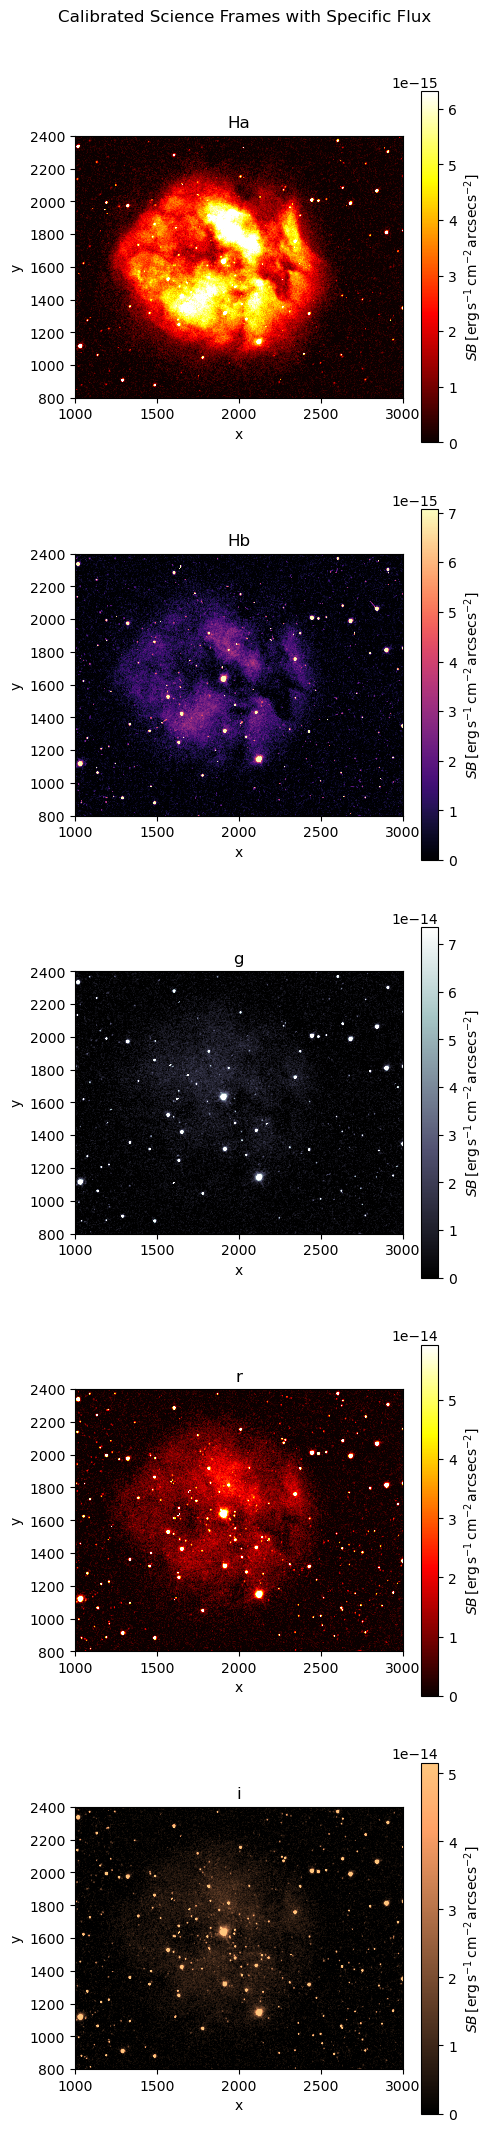

In [3]:
fig, axes = plt.subplots(5, 1, figsize=(5, 22))  
fig.suptitle("Calibrated Science Frames with Specific Flux")
axes = axes.flatten()  # Ensure axes is a flat iterable list

ny, nx = image['Ha'].shape

for i, f in enumerate(filter):
    im = axes[i].imshow(image[f], clim=[0, np.quantile(image[f], 0.99)], cmap=filter_cmap[f], origin='lower')
    plt.colorbar(im, ax=axes[i], location='right', fraction=0.05, pad=0.05,
                 label="$SB \\, [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, arcsecs^{-2}}]$")
    axes[i].set_title(f)
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].set_xlim(1000,3000)
    axes[i].set_ylim(800,2400)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust rect to prevent overlap with title
plt.show()


Ha: emission due to recombination of hydrogen atoms 3->2 
Hb: emission 4->2 
r : we are actually still seeing Ha (r broadband filter include Ha)
g : we see Hb in g broad filter
i : stellar light DIFFUSED by the nebula

# Balmer Decrement and Extinction in the HII region

The radiative transfer equation for optically thin sphere (with no diffusion involved) tells:

$$dI_\lambda = -I_\lambda\,\alpha_\lambda ds + j_\lambda ds$$

where the specific emissivity is a function of the ionized fraction (that we will assume 1 inside all nebula), the proton number density and the temperature:

$$j_\lambda = x^2 \,n_H^2 \alpha_\lambda(T)\frac{hc}{\lambda}$$

$\alpha_\lambda(T)$ is part of the effective recombination coefficient, and for $T\sim 10^4 \ \text{K}$, typical for an HII region, is $10^{-13} \mathrm{cm^3 \ s^{-1}}$ for $H\alpha$ line. The emissivity $j$ is measured in $\mathrm{erg \ s^{-1} cm^{-2} \ sterad^{-1}}$. 
Moreover we need to convert sterad to $\text{arcsec}^2$: $1 \ \text{sterad} = (206265 \text{arcsec})^2$.

For an optically thin spherical cloud (case B recombination: the cloud is optically thick only for Lyman continuum photons, but optically thin for all other transitions, like H$\alpha$ or H$\beta$):

$$SB(r) = j \, ds = 2 \int_{\arcsin(r/R_\text{cloud})}^{\pi/2} j \, R_\text{cloud}\sin(\theta)d\theta = 2 j\, R_\text{cloud} \sqrt{1-(\tfrac{r}{R_\text{cloud}})^2}$$

where $r = R_{cloud} sin(\theta)$ is the projected radius in the sky. 

However, if we consider dust absorption the full radiative transfer equation must be considered:

$$I_\lambda(\tau_\lambda) = I_{0,\lambda}e^{-\tau_\lambda} + \int_0^{\tau_\nu} e^{-(\tau_\nu-\tau_\nu')}S_\lambda(\tau_\lambda')d\tau'_\lambda$$

where the dust optical depth is:

$$\tau_\lambda = \int \alpha_\lambda ds = \int f\, n_\text{dust}\sigma_\lambda ds = \sigma_\lambda \frac{n_\text{dust}}{n_H} \int f\,n_Hds = \sigma_{\lambda,H} \, f\,n_H \, s = \sigma_{\lambda,H}\, N_H$$

where $\sigma_{\lambda,H}$ is the cross section per unit hydrogen atom for the Milky Way.

Using the language of dust people, extinction is defined as $A_\lambda ≡ 2.5 log_{10}(F_0{,\lambda}/F_\lambda)$, or $\tau_\lambda = \tfrac{A_{\lambda}}{1.086}=\tfrac{k(\lambda)E(B-V)}{1.086}$ (Calzetti), or, following Cardelli we could define a reddening parameter (total-to-selective extinction ratio) $R_V = A_V/(A_B-A_V) = A_V/E(B-V)$. “Pair method” determinations of the reddening law for many sightlines indicate that $R_V \sim 3.1$ for the “average” extinction law for diffuse regions in the local Milky Way. It can vary from $\sim 2.5$ to $\sim 6$ depending on the dust environment:



Cardelli, Clayton, and Mathis (CCM) extinction law:
Cardelli et al. (1989) showed that normalized extinction curves $A_\lambda/A_I$ (using the I band extinction to normalize) could be approximated by a seven-parameter function of wavelength: $A_\lambda/A_I \approx f(\lambda; R_V , C_1, C_2, C_3, C_4, \lambda_0, \gamma)$. 

Variations in grain composition (e.g., silicates, carbonaceous grains, ice mantles) affect the scattering and absorption efficiency, altering $R_V$​. Non-spherical grains or grains aligned with magnetic fields can affect the extinction curve, though their influence on $R_V$​ is typically secondary. 

- Diffuse ISM: Typical $R_V\sim 3.1$, associated with small grains.
- Dense Clouds: Larger grains dominate due to coagulation or icy mantles, leading to $R_V\sim 4−6$.
- Star-forming Regions: High radiation fields can destroy small grains, increasing $R_V$.



| **Feature**           | **Cardelli (CCM89)**                  | **Calzetti**                                |
|------------------------|---------------------------------------|---------------------------------------------|
| **Context**           | Milky Way extinction (ISM dust)       | Dust attenuation in starburst galaxies      |
| **Focus**             | Extinction of individual stars        | Attenuation of galaxy-wide light            |
| **Parameterization**  | \(R_V\) (total-to-selective extinction)| No explicit \(R_V\), attenuation curve      |
| **2175 Å bump**       | Prominent                            | Weak or absent                              |
| **UV Behavior**       | Moderate UV extinction               | Stronger UV attenuation                     |
| **Geometry Considered**| Uniform dust-screen model            | Complex dust-star geometry                  |


The model we will adopt consists of .  Size distributions from Weingartner & Draine (2001, hereafter WD01) "case A" model for $R_V=3.1$, renormalized following Draine (2003a). PAH C abundance relative to H is assumed to be $[\text{C/H}]_\text{PAH} = 0.93*60$ppm = 55.8ppm

**Radiative transfer for a spherical emitting and self-absorbing cloud:**

We introduce a parameter $\xi$ that accounts for over abundance in the nebula of dust with respect to the standard Milky Way conditions:

$$\tau_\lambda = \xi \, \sigma_{\lambda,H}\, N_H$$

$$I_\lambda(s) = \xi\,\sigma_{\lambda,H} \, n_H \int_0^{s} e^{-\xi\,\sigma_{\lambda,H}\,n_H\,(s-s')} \frac{j_\lambda}{\xi\,\sigma_{\lambda,H}n_H} ds' = \frac{j_\lambda}{\xi\,\sigma_{\lambda,H}\,n_H}\left(1-e^{-\xi\,\sigma_{\lambda,H}\,n_H\, s}    \right)$$


**Balmer decrements**

Dust absorption depends strongly on the wavelength. 

$$\frac{I(H\alpha)}{I(H\beta)}(s) = \frac{j_\alpha}{j_\beta} \cdot \frac{\sigma_{\beta,H}}{\sigma_{\alpha,H}} \cdot \frac{ \left(1 - e^{-\xi\,\sigma_{\alpha,H}\,n_H\,s}\right)}{\left(1 - e^{-\xi\,\sigma_{\beta,H} \, n_H \, s}\right)}$$

The ratio of the emissivities depends only on the temperature, that we can assume $T\sim 10^4$ K. It is 2.86.

Other definition:

$$L_{obs}(\lambda) = L_{int}(\lambda)10^{-0.4A_\lambda} = L_{int}(\lambda)10^{-0.4k(\lambda)E(B-V)}$$

Reddening: $E(B-V) = (B-V)_{obs}-(B-V)_{int}$

The relationship between the nebular emission-line color excess and the Balmer decrement is given by:

$$E(B - V) = \frac{E(\mathrm{H}\beta - \mathrm{H}\alpha)}{k(\lambda_{\mathrm{H}\beta}) - k(\lambda_{\mathrm{H}\alpha})} = \frac{2.5}{k(\lambda_{\mathrm{H}\beta}) - k(\lambda_{\mathrm{H}\alpha})} \log_{10} \left[ \frac{(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{obs}}}{(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{int}}} \right]$$

where $(k(\lambda_{\mathrm{H}\beta}))$ and $(k(\lambda_{\mathrm{H}\alpha}))$ are the reddening curves evaluated at $H\beta$ and $H\alpha$ wavelengths, respectively. The factor $E(\mathrm{H}\beta - \mathrm{H}\alpha)$ is analogous to the color excess but defined for $H\beta$ and $H\alpha$ instead of the B and V bands. Then, $(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{obs}}$ is the observed Balmer decrement, and $(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{int}}$ is the intrinsic or unreddened Balmer decrement, which is calculated theoretically.

The intrinsic Balmer decrement remains roughly constant for typical gas conditions in star-forming galaxies (see Osterbrock 1989). In our analysis, we assume the value of $(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{int}} = 2.86$, corresponding to a temperature $T = 10^4 \, \mathrm{K}$ and an electron density $n_e = 10^2 \, \mathrm{cm}^{-3}$ for Case B recombination (Osterbrock 1989). This choice is standard for star-forming galaxies in the literature. Thus, the nebular color excess is given by the following equation:

$$E(B - V) = 1.97 \log_{10} \left( \frac{(\mathrm{H}\alpha/\mathrm{H}\beta)_{\mathrm{obs}}}{2.86} \right)$$

### Case B Recombination:

***Lyman Continuum Photons are Reabsorbed***:
When a hydrogen atom recombines with an electron and transitions to the n=1 ground state, it emits a photon in the Lyman series (e.g., Lyman-α). Under Case B, these Lyman photons are absorbed and reprocessed within the gas, instead of escaping.
This reabsorption occurs because the gas is dense enough to be optically thick to ultraviolet photons in the Lyman series.

***Other Transitions are Optically Thin***:
Photons from transitions to levels n>1n (e.g., Hα from n=3→2) can escape the nebula without significant reabsorption.
This results in the prominence of Balmer, Paschen, and other series of hydrogen emission lines in the spectrum.


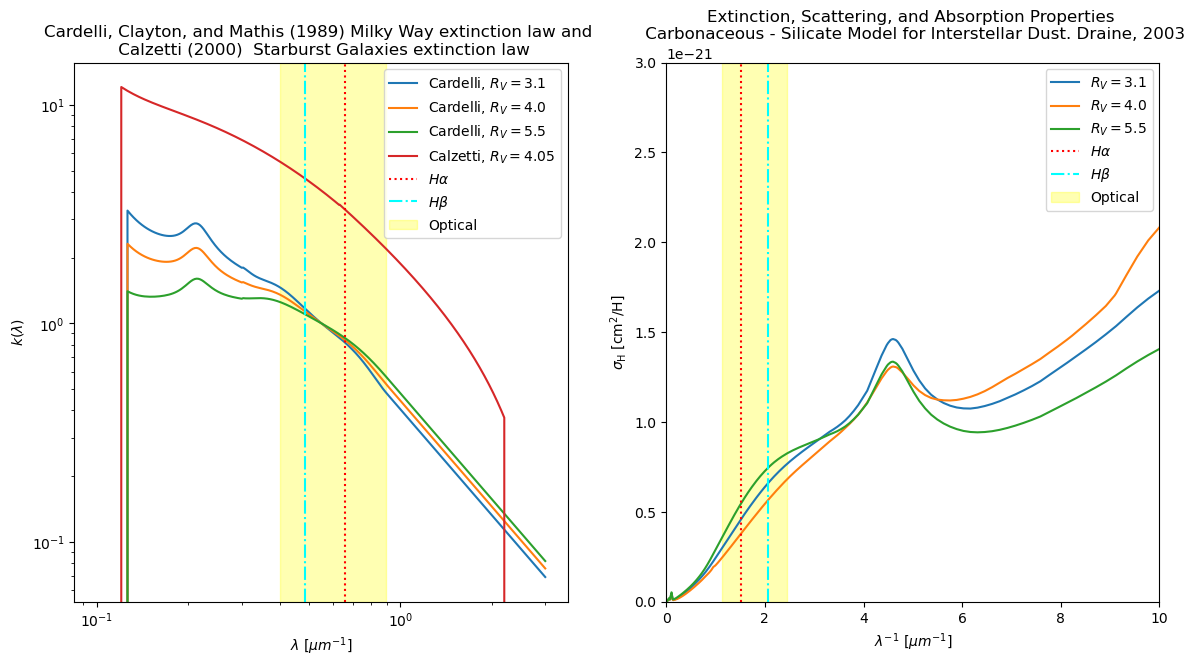

k(Ha) = 0.82 (Cardelli), 3.33 (Calzetti)
k(Hb) = 1.16 (Cardelli), 4.60 (Calzetti)


In [ ]:
# TASK ONE: EXTINCTION 

**1. Mask stars**

In [7]:
from astropy.modeling import models, fitting
from scipy.ndimage import median_filter

# This subtraction highlights stars while suppressing extended nebular structures, making it easier to detect and mask stars:
filtered_image = image['Ha'] - median_filter(image['Ha'], size=10)

masked_Ha = np.copy(image['Ha'])  
masked_Hb = np.copy(image['Hb']) 

for star in stars_astrometry:
    if 1000 < star['x'] < 3000 and 800 < star['y'] < 2400:
        l = 25
        rectangle = filtered_image[int(star['y'] - l):int(star['y'] + l), 
                                        int(star['x'] - l):int(star['x'] + l)]
        y, x = np.mgrid[:rectangle.shape[0], :rectangle.shape[1]]
        g_init = models.Gaussian2D(amplitude=rectangle.max(), x_mean=l, y_mean=l, x_stddev=5, y_stddev=5)
        fit = fitting.LevMarLSQFitter()
        g_fit = fit(g_init, x, y, rectangle)
            
        refined_x = star['x'] - l + g_fit.x_mean.value
        refined_y = star['y'] - l + g_fit.y_mean.value

        sigma_x, sigma_y = g_fit.x_stddev.value, g_fit.y_stddev.value
        fwhm_x = 2.355 * sigma_x
        fwhm_y = 2.355 * sigma_y
        fwhm = (fwhm_x + fwhm_y) / 2
        y, x = np.ogrid[:masked_Ha.shape[0], :masked_Hb.shape[1]] # circular aperture mask around the star

        # For a symmetric Gaussian, the flux has reduced by approximately 98.89% at 1.5×FWHM
        if fwhm < l/2:
            mask_radius = 2 * fwhm 
            mask = (x - refined_x)**2 + (y - refined_y)**2 <= mask_radius**2    
            masked_Ha[mask] = 0
            masked_Hb[mask] = 0


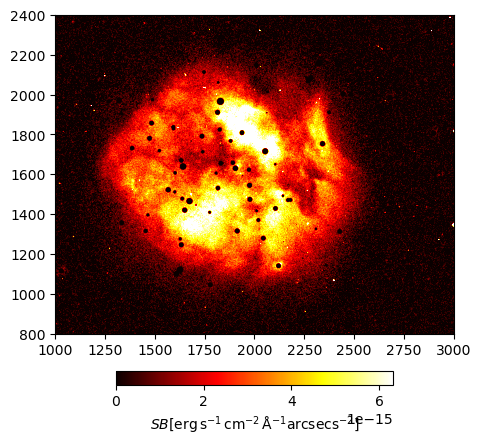

In [8]:
im = plt.imshow(masked_Ha, cmap=filter_cmap['Ha'],clim=[0, np.quantile(image['Ha'], 0.99)],origin='lower')
plt.colorbar(im, location='bottom', fraction=0.0375, pad=0.1, label="$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

center_x, center_y = radec_to_xy(328.370134,47.266320) 
plt.xlim(1000,3000)
plt.ylim(800,2400)
plt.show()

**2. Smoothing (Low-Pass Filters)**

A low-pass filter is a type of signal processing filter that allows low-frequency components to pass through while attenuating or suppressing high-frequency components. In the context of image processing, low-pass filters are used for smoothing or blurring images by removing noise or fine details.

$$I'(x,y)=\sum_{u=-k}^k\sum_{v=-k}^k I(x+u,y+v)\cdot h(u,v)$$

- $I(x,y)$: Original image intensity at $(x,y)$
- $I′(x,y)$: Filtered image intensity at $(x,y)$
- $h(u,v)$: Filter kernel (defines the filter behavior)
- $k$: Defines the size of the kernel (e.g., 3×3, 5×5).

Filter kernels:

1. Gaussian Filter: Blurs an image using a Gaussian kernel. Smooths edges but introduces slight blurring.
2. Median Filter: Replaces each pixel with the median value of its neighborhood. Good for removing salt-and-pepper noise.
3. Box Filter (Average Filter): Replaces each pixel with the average of its neighborhood.

In [9]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter


# GAUSSIAN FILTER
sigma_f = 10  

smoothed_image_Ha_gauss = gaussian_filter(masked_Ha, sigma=sigma_f)
smoothed_image_Hb_gauss = gaussian_filter(masked_Hb, sigma=sigma_f)


In [195]:
# MEDIAN FILTER
size = 10  

smoothed_image_Ha_median = median_filter(masked_Ha, size=size)
smoothed_image_Hb_median = median_filter(masked_Hb, size=size)

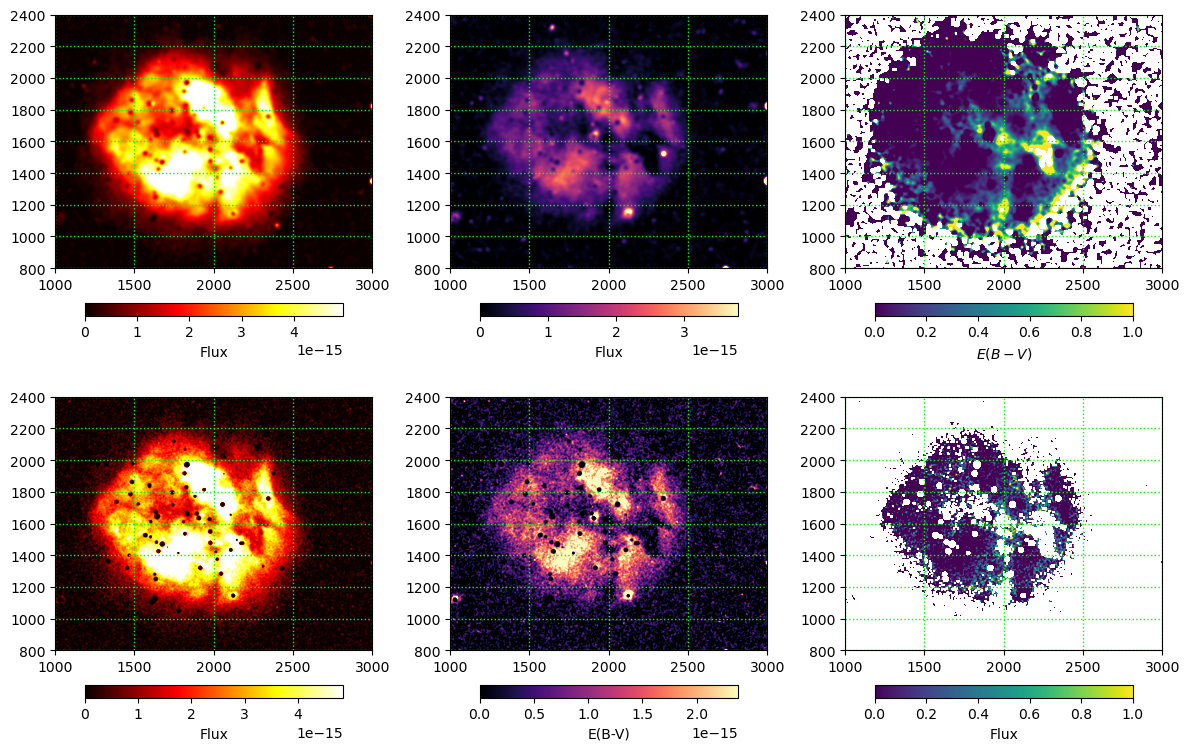

In [196]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot Hα flux
im0 = axes[0].imshow(smoothed_image_Ha_gauss,origin='lower',clim=[0, np.quantile(smoothed_image_Ha_gauss, 0.99)], cmap='hot')
#axes[0].set_title('Integrated Flux for Hα')
fig.colorbar(im0, ax=axes[0], location='bottom', fraction=0.0375, pad=0.1, label='Flux')

# Plot Hβ flux
im1 = axes[1].imshow(smoothed_image_Hb_gauss,clim=[0, np.quantile(smoothed_image_Hb_gauss, 0.99)], origin='lower', cmap='magma')#, extent=[0, cols, 0, rows])
#axes[1].set_title('Integrated Flux for Hβ')
fig.colorbar(im1, ax=axes[1], location='bottom', fraction=0.0375, pad=0.1,label='Flux')

EBmV = 1.97 * np.log10(smoothed_image_Ha_gauss/smoothed_image_Hb_gauss /2.86)

im2 = axes[2].imshow(EBmV, clim = [0,1], origin='lower', cmap='viridis')
#axes[2].set_title('Integrated Flux for Hβ')
fig.colorbar(im2, ax=axes[2], location='bottom', fraction=0.0375, pad=0.1,label='$E(B-V)$')


# Plot Hα flux
im0 = axes[3].imshow(smoothed_image_Ha_median,origin='lower',clim=[0, np.quantile(smoothed_image_Ha_median, 0.99)], cmap='hot')
#axes[3].set_title('Integrated Flux for Hα')
fig.colorbar(im0, ax=axes[3], location='bottom', fraction=0.0375, pad=0.1, label='Flux')

# Plot Hβ flux
im1 = axes[4].imshow(smoothed_image_Hb_median,clim=[0, np.quantile(smoothed_image_Hb_median, 0.99)], origin='lower', cmap='magma')#, extent=[0, cols, 0, rows])
#axes[4].set_title('Integrated Flux for Hβ')
fig.colorbar(im1, ax=axes[4], location='bottom', fraction=0.0375, pad=0.1,label='E(B-V)')

EBmV = 1.97 * np.log10(smoothed_image_Ha_median/smoothed_image_Hb_median /2.86)

im2 = axes[5].imshow(EBmV, clim = [0,1], origin='lower', cmap='viridis')
#axes[5].set_title('E(B-V)')
fig.colorbar(im2, ax=axes[5], location='bottom', fraction=0.0375, pad=0.1,label='Flux')



for i in range(6):
    axes[i].set_xlim(1000,3000)
    axes[i].set_ylim(800,2400)
    axes[i].set_aspect('equal')  # Ensures the grid cells are square
    axes[i].grid(visible=True, linestyle=':', linewidth=1,c='lime')

plt.tight_layout()
plt.show()


**Average Value**

In [29]:
# Central star is BD+46 3474 ( 	21 53 28.849152 	+47 15 59.78412   or    328.370205 	47.266607   J2000 ) 
# https://simbad.u-strasbg.fr/simbad/sim-coo?&Coord=328.375681513405d47.263674788998d&CooFrame=FK5&Radius=2&Radius.unit=arcmin
center_x, center_y = radec_to_xy(328.370134,47.266320) 

R_ext = 500 # pixels

from photutils.aperture import CircularAperture, aperture_photometry

aperture = CircularAperture((center_x, center_y), R_ext)
    
# Ha
phot_Ha = aperture_photometry(masked_Ha, aperture, error = np.full(masked_Ha.shape, sigma['Ha']))
F_Ha = phot_Ha['aperture_sum'][0]
F_Ha_err = phot_Ha['aperture_sum_err'][0]   

# Hb
phot_Hb = aperture_photometry(masked_Hb, aperture, error = np.full(masked_Hb.shape, sigma['Hb']))
F_Hb = phot_Hb['aperture_sum'][0]
F_Hb_err = phot_Hb['aperture_sum_err'][0]



In [34]:
print(f"Total flux in Ha filter is  {F_Ha:.2e} ± {F_Ha_err:.2e}" )

print(f"Total flux in Hb filter is  {F_Hb:.2e} ± {F_Hb_err:.2e}")

Balmer_mean = F_Ha / F_Hb
Balmer_mean_err = np.sqrt((F_Ha_err/F_Hb)**2 + (F_Hb_err*F_Ha/F_Hb**2)**2)

print(f"Average Ha/Hb decrement is  {Balmer_mean:.2f} ± {Balmer_mean_err:.2e}")

EBmV_mean = 1.97 * np.log10(Balmer_mean/2.86)
EBmV_mean_err = 1.97 * Balmer_mean_err /(np.log(10)*Balmer_mean/2.75)

print(f"Average E(B-V) is  {EBmV_mean:.2f} ± {EBmV_mean_err:.2e}")

Total flux in Ha filter is  2.65e-09 ± 1.66e-12
Total flux in Hb filter is  8.67e-10 ± 2.28e-12
Average Ha/Hb decrement is  3.05 ± 8.25e-03
Average E(B-V) is  0.06 ± 6.35e-03


In [14]:
print(3.3*0.34)
tau = 3.3*0.06

1.122


In [ ]:
parsec = 3.086e18             # cm
distance = 714 * parsec
n_H = 1e2                    # Hydrogen number density typical for HII region [cm^-3]
x = 0.1                      # ionized fraction
csi = 20                      # dust parameter

# GAIA

Check extinction looking GAIA spectra:


- pmra (D), pmdec (D):

    Meaning: Proper motion in the right ascension (pmra) and declination (pmdec) directions. These describe how the star is moving across the sky.
    Unit: Milliarcseconds per year (mas/yr).
    How it’s computed: These values are derived from the star's position at different times, tracking its motion relative to more distant background stars.

- ruwe (E):

    Meaning: The Renormalized Unit Weight Error (RUWE) quantifies the quality of the astrometric solution (parallax and proper motion).
    How it’s computed: RUWE is derived from the variance of the fit to the star's position and motion over time. A value close to 1 indicates a good fit.

- phot_g_mean_mag (E):

    Meaning: The mean magnitude in the GAIA G-band.
    Unit: Magnitude (mag).
    How it’s computed: This is the observed brightness of the star in the G-band, which GAIA measures through its photometric observations.

- bp_rp (E):

    Meaning: The difference between the magnitudes in the blue photometric band (BP) and the red photometric band (RP). This is also known as the color index.
    Unit: Magnitude (mag).
    How it’s computed: GAIA measures the star’s brightness in both the blue (BP) and red (RP) bands, and the difference between these values gives the color index, which is related to the star's temperature.

- radial_velocity (E):

    Meaning: The radial velocity of the star, or how fast it is moving towards or away from us along the line of sight.
    Unit: km/s.
    How it’s computed: This is derived from the Doppler shift of the star's spectral lines, which GAIA measures. The shift indicates whether the star is moving toward or away from Earth.

1- phot_variable_flag (13A):

    Meaning: A flag indicating whether the star is variable in brightness.
    How it’s computed: This flag is set based on whether the star shows significant variability in its brightness over time.

- non_single_star (I):

    Meaning: A flag indicating whether the star is part of a binary or multiple star system.
    How it’s computed: This is determined through astrometric measurements, such as the star's motion or other evidence of companions.

12. has_xp_continuous, has_xp_sampled, has_rvs, has_epoch_photometry, has_epoch_rv, has_mcmc_gspphot, has_mcmc_msc (L):

    Meaning: These are flags indicating whether certain types of data or analyses are available for the star.
    How it’s computed: These are binary flags indicating the presence of continuous photometry, radial velocity data, and other measurements.

- teff_gspphot (E):

    Meaning: The effective temperature of the star.
    Unit: Kelvin (K).
    How it’s computed: The effective temperature is derived from the star's color and luminosity using models of stellar atmospheres, typically from the GAIA photometric data and spectroscopic observations.

- logg_gspphot (E):

    Meaning: The surface gravity of the star, measured in log units (logarithmic scale).
    Unit: log(cm/s²).
    How it’s computed: This is derived from the star’s luminosity, radius, and mass. It’s related to the star's stage in its lifecycle.

- mh_gspphot (E):

    Meaning: The metallicity of the star, given in logarithmic units (dex).
    Unit: dex.
    How it’s computed: Metallicity is derived from the star’s spectrum and photometric measurements. It indicates the abundance of elements heavier than hydrogen and helium in the star.

- distance_gspphot (E):

    Meaning: The distance to the star.
    Unit: Parsecs (pc).
    How it’s computed: The distance is derived from the parallax measurements using the formula d=1/parallaxd=1/parallax (in arcseconds).

- azero_gspphot, ag_gspphot, ebpminrp_gspphot (E):

    Meaning: These are extinction and reddening parameters that describe how the star’s light is affected by interstellar dust.
    Unit: Magnitude (mag).
    How it’s computed: These are computed through photometric observations of the star and its surroundings, using models for interstellar dust.


# Central star

In [30]:
# Central star is BD+46 3474 ( 	21 53 28.849152 	+47 15 59.78412   or    328.370205 	47.266607   J2000 ) 
# https://simbad.u-strasbg.fr/simbad/sim-coo?&Coord=328.375681513405d47.263674788998d&CooFrame=FK5&Radius=2&Radius.unit=arcmin

with fits.open("GAIA/XP_SAMPLED-Gaia DR3 1974546106933956608.fits") as hdul:
    w = 10 * hdul[1].data['wavelength']               # wavelength in armstrong (GAIA original data gives wavelength in nm)
    flux = 1.e2 * hdul[1].data['flux']                # specific flux in erg/s/cm2/armstrong (GAIA original data gives fluxes in W/m^2/nm)
    flux_error = 1.e2 * hdul[1].data['flux_error']    # error


# FRom paper
T_star = 30500                  # star surface temperature [K] 
R_sun = 6.96e10                 # solar radius in cm
R_star = 5.2 * R_sun            # star radius 


In [22]:
print(w.shape)
a = np.array([1,2])
print(a.shape)

(343,)
(2,)


In [46]:
h = 6.62607015e-27                 # Planck's constant (erg·s)
c = 3.0e10                         # Speed of light (cm/s)
k_B = 1.380649e-16                 # Boltzmann's constant (erg/K)
sigma_Stefan_Boltzmann = 5.67e-5   # cgs
parsec = 3.086e18                  # cm

def intrinsic_flux(w,T_star,R_star,distance):
    """
    Assuming perfect black body of temperature T and emitting surface R 
    w in Armstrong
    returns intrinsic specific flux in erg/s/cm^2/armstrong 
    """
    w_cm = w * 1e-8 # wavelength in cm
    
    black_body = (2 * h * c**2) / (w_cm**5) * 1 / (np.exp((h * c) / (w_cm * k_B * T_star)) - 1)

    return 1e-8 * (R_star**2/distance**2) * np.pi * black_body


#########################################



def observed_flux(w,T_star,R_star,distance,
                  EBmV, Rv,
                  Cardelli = False,
                  Calzetti = False, 
                  Fitzpatrick = False, n_H = 1e2, R_cloud = 0.8*parsec):
    """
    Dust absorption
    w in Armstrong
    returns observed specific flux in erg/s/cm^2/armstrong 
    """
    w_micron = w*1e-4

    if Cardelli:
        return intrinsic_flux(w,T_star,R_star,distance) * np.exp(-ccm_extinction(w_micron,Rv) * EBmV)
        
    if Calzetti:
        return intrinsic_flux(w,T_star,R_star,distance) * np.exp(-calzetti_extinction(w_micron,Rv) * EBmV)

    if Fitzpatrick:
        csi = 20
        tau_lambda = dust_extinction[str(Rv)]['extinction_H_curve'](w_micron) * csi * n_H * R_cloud
        
        return intrinsic_flux(w,T_star,R_star,distance) * np.exp(-tau_lambda)


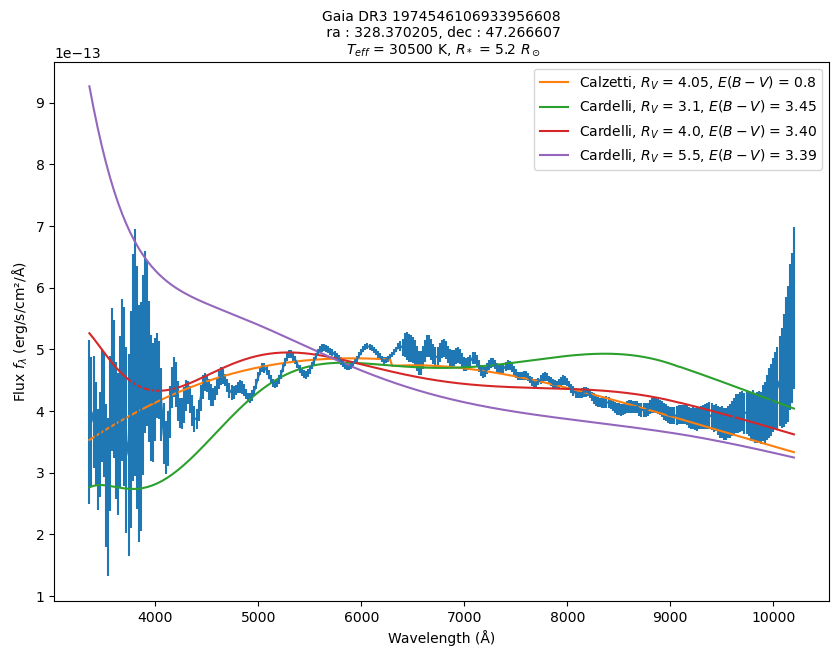

In [56]:
fig,ax = plt.subplots(figsize=(10,7))

plt.errorbar(w,flux,flux_error)
plt.ylabel('Flux $f_\lambda$ (erg/s/cm²/Å)', fontsize=10)
plt.xlabel('Wavelength (Å)', fontsize=10)
plt.title(f"Gaia DR3 1974546106933956608\n ra : 328.370205, dec : 47.266607\n $T_{{eff}}$ = {T_star} K, $R_*$ = {R_star/R_sun:.1f} $R_\odot$",fontsize=10)


parsec = 3.086e18               # cm
distance = 714 * parsec

from scipy.optimize import curve_fit

# Calzetti

# Model function
def model(w, EBmV):
    return observed_flux(w, T_star, R_star, distance, EBmV, Rv = 4.05, Calzetti=True)

# Fit the model
popt, pcov = curve_fit(model, w, flux, sigma=flux_error)

chi2 = chi_squared(flux, model_flux_calzetti, flux_error)

# popt contains the optimized parameter k
optimized_EBmV = popt[0]

plt.plot(w,observed_flux(w,T_star,R_star,distance,optimized_EBmV,Rv = 4.05,Calzetti=True),
        label=f"Calzetti, $R_V$ = 4.05, $E(B-V)$ = {optimized_EBmV:.1f}")


# CARDELLI

for rv in [3.1,4.0,5.5]:

    def model(w, EBmV):
        return observed_flux(w, T_star, R_star, distance, EBmV, Rv = rv,Cardelli=True)

    popt, pcov = curve_fit(model, w, flux, sigma=flux_error)
    optimized_EBmV = popt[0]

    plt.plot(
        w, observed_flux(w, T_star, R_star, distance, optimized_EBmV, Rv = rv,Cardelli=True),
        label=f"Cardelli, $R_V$ = {rv}, $E(B-V)$ = {optimized_EBmV:.2f}"
    )


#plt.plot(w,observed_flux(w,T_star,R_star,distance,EBmV=0.85,Fitzpatrick=True))


plt.legend()

plt.show()


In [ ]:
# Cardelli



# Other stars

In [37]:
from astropy.io import fits
import pandas as pd

stars_nebula = []

with fits.open("GAIA_nebula.fits") as hdul:
    #hdul.info()  # Display information about the HDU list

    data = hdul[1].data
    star_id = data['source_id']

    for i in range(len(data)):

        star = {}
        star['id'] = data['source_id'][i]
        star['ra'] = data['ra'][i]
        star['dec'] = data['dec'][i]
        star['phot_g_mean_mag'] = data['phot_g_mean_mag'][i]
        star['distance'] = data['distance_gspphot'][i]
        star['teff_gspphot'] = data['teff_gspphot'][i]
        star['azero_gspphot'] = data['azero_gspphot'][i]
        star['ag_gspphot'] = data['ag_gspphot'][i]
        star['ebpminrp_gspphot'] = data['ebpminrp_gspphot'][i]
        stars_nebula.append(star)
    
df = pd.DataFrame(stars_nebula)

from IPython.display import display, HTML

# Display the DataFrame with scrollable view
display(HTML('<style>.dataframe{width:110%; height:400px; overflow:auto;}</style>'))
display(df)


id          ra        dec  phot_g_mean_mag     distance  \
0   1974546106933956608  328.370198  47.266607         9.417656          NaN   
1   1974546003858802944  328.371418  47.245519        13.933989   753.253601   
2   1974546313096440192  328.350331  47.284197        13.887127          NaN   
3   1974546484895135104  328.389930  47.284598        14.684779          NaN   
4   1974546450535495680  328.410688  47.286004        14.809831          NaN   
5   1974545900779588736  328.354618  47.233381        12.940945          NaN   
6   1974546381815916416  328.361383  47.302079        13.594463   788.151184   
7   1974545213584824960  328.394645  47.231685        11.515630          NaN   
8   1974545625901684352  328.428311  47.257694        12.054384          NaN   
9   1974545793398295680  328.433260  47.273591        12.373564          NaN   
10  1974544728246406656  328.289702  47.255450        12.738444   401.447388   
11  1974545351023780224  328.445409  47.239768        13.043392   716.545715   
12  1974546622334086016  328.419158  47.314735        14.339408   587.709106   
13  1974734295222588928  328.310812  47.316987        14.142795   214.977600   
14  1974546587974449024  328.445329  47.306386        14.428048          NaN   
15  1974544869987525504  328.375724  47.201285         9.478102   120.393501   
16  1974732474156457856  328.271804  47.270866        14.618553   645.794189   
17  1974545488462733056  328.468365  47.257286        14.394691   567.128113   
18  1974734157783635968  328.275293  47.293478        14.590594          NaN   
19  1974734157783635712  328.272101  47.294799        14.947042  4804.360840   
20  1974542361726544384  328.438505  47.209745        13.476866          NaN   
21  1974544384649023744  328.312401  47.202652        12.683226          NaN   
22  1976046699791963520  328.484382  47.268394        13.919009   755.321106   
23  1974732645955148416  328.252700  47.277107        11.436987   438.507996   
24  1974546858550184832  328.435894  47.336067        11.981919   208.446899   
25  1974732645955148288  328.246600  47.274428        13.505412          NaN   
26  1974734741899186816  328.365309  47.353902        13.087809   690.860413   
27  1976048074181478016  328.444815  47.338557        14.940351          NaN   
28  1974544320231472640  328.270925  47.203461        14.611612  7949.312988   
29  1976047902382785664  328.455484  47.345362        13.298892  3305.889160   

    teff_gspphot  azero_gspphot  ag_gspphot  ebpminrp_gspphot  
0            NaN            NaN         NaN               NaN  
1    6443.149902         2.6954      2.1228            1.1613  
2            NaN            NaN         NaN               NaN  
3            NaN            NaN         NaN               NaN  
4            NaN            NaN         NaN               NaN  
5            NaN            NaN         NaN               NaN  
6    6718.354004         2.2381      1.8206            0.9982  
7            NaN            NaN         NaN               NaN  
8            NaN            NaN         NaN               NaN  
9            NaN            NaN         NaN               NaN  
10   5495.173340         0.1244      0.1027            0.0553  
11   5618.284668         0.4882      0.4019            0.2173  
12   5256.182617         0.4004      0.3238            0.1745  
13   4136.578613         0.7596      0.5403            0.2968  
14           NaN            NaN         NaN               NaN  
15   5805.769043         0.0010      0.0009            0.0005  
16   5693.623535         0.5326      0.4393            0.2379  
17   5251.415039         0.4259      0.3431            0.1838  
18           NaN            NaN         NaN               NaN  
19   4529.190918         4.1136      2.8360            1.5551  
20           NaN            NaN         NaN               NaN  
21           NaN            NaN         NaN               NaN  
22   5655.952637         0.5433      0.4461            0.2414  
23  

In [38]:
from astroquery.gaia import Gaia

retrieval_type = 'XP_SAMPLED'     # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'     # Options are: 'INDIVIDUAL' or 'RAW'
data_release   = 'Gaia DR3'       # Options are: 'Gaia DR3' (default), 'Gaia DR2'

datalink = Gaia.load_data(ids=star_id,
                          data_release=data_release, 
                          retrieval_type=retrieval_type, 
                          data_structure=data_structure);

dl_keys  = [inp for inp in datalink.keys()]
#print(dl_keys)

for i in range(len(data)):
    wavelengths = datalink[dl_keys[i]][0].to_table().as_array()['wavelength']
    flux = datalink[dl_keys[i]][0].to_table().as_array()['flux']
    flux_error = datalink[dl_keys[i]][0].to_table().as_array()['flux_error']
    
    stars_nebula[i]['wavelength'] = 10 * wavelengths
    stars_nebula[i]['flux'] = 1e2 * flux
    stars_nebula[i]['flux_error'] = 1e2 * flux_error


In [39]:


n_H = 1e2
csi = 50
#R_inner_void = 1.5 / 3437.75 * distance  # Radius of the innermost depleted region
#R_cloud = 5 / 3437.75 * distance         # Stromgren radius
#EBmV = 0.85

#R_cloud = 0.84 * parsec

parsec = 3.086e18               # cm

R_sun = 6.957e10 # cm
T_sun = 5778     # K
L_sun = 3.846e33 # erg/s

def R(T_star,m_g_star,distance):
    """
    Star radius assuming perfect black body emission L = 4 pi R^2 sigma_SB T^4
    Given: T, star'surface temperature in K and M_g_star (brightness in g band, NOT ABSORBED), d distance in cm
    """
    M_g_star = m_g_star - 5 * (np.log10(distance/parsec / 10))   
    L_star = L_sun * 10**(4.83 - M_g_star)
    #print(L_star/L_sun)
    return np.sqrt(L_star/(4*np.pi * sigma_Stefan_Boltzmann * T_star**4))


def intrinsic_flux(w,T_star,m_g_star,distance):
    """
    Assuming perfect black body of temperature T and emitting surface R 
    w in Armstrong
    returns intrinsic specific flux in erg/s/cm^2/armstrong 
    """
    w_cm = w * 1e-8 # wavelength in cm
    
    black_body = (2 * h * c**2) / (w_cm**5) * 1 / (np.exp((h * c) / (w_cm * k_B * T_star)) - 1)
    R_star = R(T_star,m_g_star,distance)
    
    return 1e-8 * (R_star**2/distance**2) * np.pi * black_body


#########################################

def observed_flux(w,T_star,m_g_star,A_g_star,distance,
                  EBmV,
                  Cardelli = False,
                  Calzetti = False,
                  Fitzpatrick = False, Rv = 3.1):
    """
    Dust absorption
    w in Armstrong
    returns observed specific flux in erg/s/cm^2/armstrong 
    """
    w_micron = w*1e-4
    m_g_corrected = m_g_star - A_g_star

    if Cardelli:
        return intrinsic_flux(w,T_star,m_g_corrected,distance) * np.exp(-ccm_extinction(w_micron) * EBmV)
        
    if Calzetti:
        return intrinsic_flux(w,T_star,m_g_corrected,distance) * np.exp(-calzetti_extinction(w_micron) * EBmV)

    if Fitzpatrick:
        csi = 20
        print("ehi")
        tau_lambda = dust_extinction[str(Rv)]['extinction_H_curve'](w_micron) * csi * n_H * R_cloud
        
        return intrinsic_flux(w,T_star,m_g_corrected,distance) * np.exp(-tau_lambda)

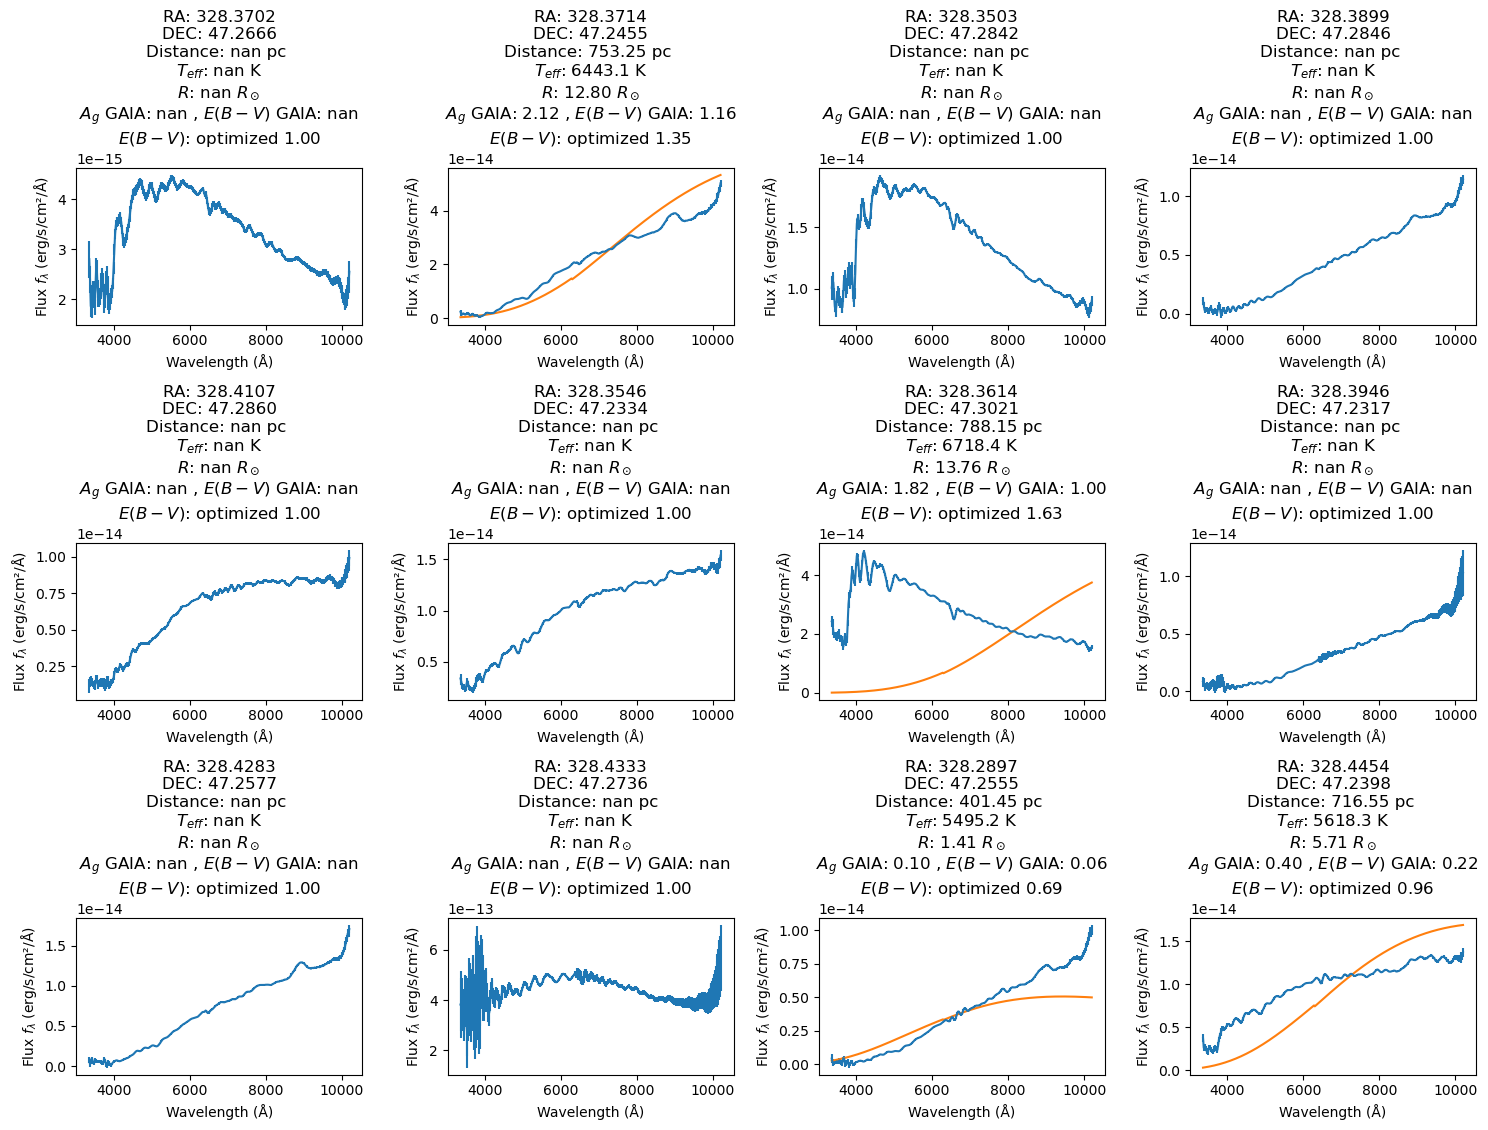

In [43]:
fig, axes = plt.subplots(3, 4, figsize=(15, 12))  
axes = axes.flatten()  

#good_stars = [star for star in stars_nebula if star['distance'] > 700]
good_stars = stars_nebula

from scipy.optimize import curve_fit

for i, star in enumerate(good_stars):
    if i >= len(axes):  # Prevent trying to plot if we run out of subplots
        break

    ax = axes[i]
    ax.errorbar(star['wavelength'], star['flux'], star['flux_error'])

    # assuming main sequence star realition : R = R_sun(T/T_sun)
    ra = star['ra']
    dec = star['dec']
    T_star = star['teff_gspphot']
    m_g_star = star['phot_g_mean_mag']
    A_g_star = star['ag_gspphot']
    EBmV_GAIA = star['ebpminrp_gspphot']
    distance = star['distance'] * parsec

    # Fit EBmV

    def model(w, EBmV):
        return observed_flux(w,T_star,m_g_star,A_g_star,distance,EBmV,Calzetti=True)

    
    popt, pcov = curve_fit(model, star['wavelength'], star['flux'], sigma = star['flux_error']) #p0=initial_guess)

    # popt contains the optimized parameter k
    optimized_EBmV = popt[0]
    
    ax.plot(star['wavelength'],observed_flux(star['wavelength'],T_star,m_g_star,A_g_star,distance,Calzetti=True,EBmV=optimized_EBmV))
    
    ax.set_ylabel('Flux $f_\\lambda$ (erg/s/cm²/Å)', fontsize=10)
    ax.set_xlabel('Wavelength (Å)', fontsize=10)
    ax.set_title(
        f"RA: {ra:.4f}\nDEC: {dec:.4f}\nDistance: {distance/parsec:.2f} pc \n"
        f"$T_{{eff}}$: {T_star:.1f} K \n$R$: {R(T_star,m_g_star-A_g_star,distance)/R_sun:.2f} $R_\odot$\n"
        f"$A_g$ GAIA: {A_g_star:.2f} , $E(B-V)$ GAIA: {EBmV_GAIA:.2f}\n"
        f"$E(B-V)$: optimized {optimized_EBmV:.2f}",
        fontsize=12
    )

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()



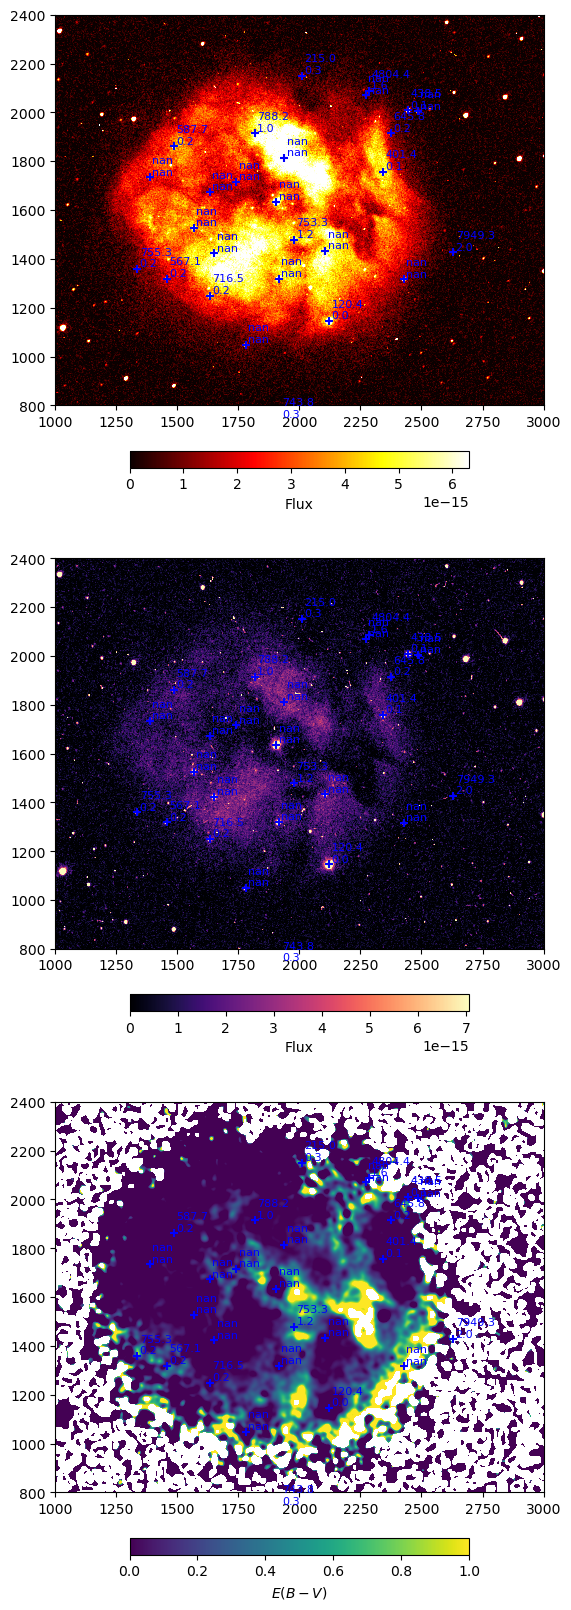

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = axes.flatten()

# Plot Hα flux
im0 = axes[0].imshow(image['Ha'],origin='lower',clim=[0, np.quantile(image['Ha'], 0.99)], cmap='hot')
#axes[0].set_title('Integrated Flux for Hα')
fig.colorbar(im0, ax=axes[0], location='bottom', fraction=0.0375, pad=0.1, label='Flux')

# Plot Hβ flux
im1 = axes[1].imshow(image['Hb'],clim=[0, np.quantile(image['Hb'], 0.99)], origin='lower', cmap='magma')#, extent=[0, cols, 0, rows])
#axes[1].set_title('Integrated Flux for Hβ')
fig.colorbar(im1, ax=axes[1], location='bottom', fraction=0.0375, pad=0.1,label='Flux')

EBmV = 1.97 * np.log10(smoothed_image_Ha_gauss/smoothed_image_Hb_gauss /2.86)

im2 = axes[2].imshow(EBmV, clim = [0,1], origin='lower', cmap='viridis')
#axes[2].set_title('Integrated Flux for Hβ')
fig.colorbar(im2, ax=axes[2], location='bottom', fraction=0.0375, pad=0.1,label='$E(B-V)$')

#center_x, center_y = radec_to_xy(328.370134,47.266320) 
#plt.scatter(center_x, center_y, marker='+', c='lime')

for j in range(3):
    for i in range(len(stars_nebula)):
        ra = stars_nebula[i]['ra']
        dec = stars_nebula[i]['dec']
        x, y = radec_to_xy(ra,dec)
        axes[j].scatter(x,y,marker='+',c='blue')
        d = stars_nebula[i]['distance']
        EBmV_GAIA = stars_nebula[i]['ebpminrp_gspphot']    
        axes[j].text(x+10,y+10,f"{d:.1f}\n{EBmV_GAIA:.1f}",c='blue',fontsize=8)
    
    axes[j].set_xlim(1000,3000)
    axes[j].set_ylim(800,2400)

plt.show()

In [2]:
# import sampled ... spectra
from astroquery.gaia import Gaia


In [60]:
print(str(3.1))

3.1


# Hypotesis 1: optically thin, uniform sphere

In [11]:

# Central star is BD+46 3474 ( 	21 53 28.849152 	+47 15 59.78412   or    328.370205 	47.266607   J2000 ) 
# https://simbad.u-strasbg.fr/simbad/sim-coo?&Coord=328.375681513405d47.263674788998d&CooFrame=FK5&Radius=2&Radius.unit=arcmin
center_x, center_y = radec_to_xy(328.370134,47.266320) 

# Define the inner and outer radii for the circular annuli such that each annulus contains the same number of pixels
num_annuli = 40
N = 50000
R_int_pixel = [0.1]
R_ext_pixel = []

for i in range(num_annuli):
    r_ext = np.sqrt(N/np.pi + R_int_pixel[-1]**2)  # Use the previous outer radius to define the next outer radius
    R_ext_pixel.append(r_ext)
    R_int_pixel.append(r_ext)

# Generate the list of annuli radii as tuples of inner and outer radii (PIXEL SPACE)
annuli_radii = [(R_int_pixel[i], R_ext_pixel[i]) for i in range(num_annuli)]  

# Average surface brightness in each annulus
from photutils.aperture import CircularAnnulus, aperture_photometry

average_surface_brightness_Ha = []
sigma_surface_brightness_Ha = []

average_surface_brightness_Hb = []
sigma_surface_brightness_Hb = []

balmer_decrement = []
balmer_decrement_error = []

for inner_r, outer_r in annuli_radii:

    annulus = CircularAnnulus((center_x, center_y), r_in=inner_r, r_out=outer_r)

    # Ha
    phot = aperture_photometry(masked_Ha, annulus, error = np.full(masked_Ha.shape, sigma['Ha']))
    I_Ha = phot['aperture_sum'][0]
    Ha_err = phot['aperture_sum_err'][0]               # = sqrt(N) * sigma
    average_surface_brightness_Ha.append(I_Ha / N)
    sigma_surface_brightness_Ha.append(Ha_err / N)

    # Hb
    phot = aperture_photometry(masked_Hb, annulus, error = np.full(masked_Hb.shape, sigma['Hb']))
    I_Hb = phot['aperture_sum'][0]
    Hb_err = phot['aperture_sum_err'][0]
    average_surface_brightness_Hb.append(I_Hb / N)
    sigma_surface_brightness_Hb.append(Hb_err / N)

    balmer_decrement.append(I_Ha/I_Hb)
    propagated_error = np.sqrt((Ha_err/I_Hb)**2 + (I_Ha/I_Hb**2 * Hb_err )**2)
    balmer_decrement_error.append(propagated_error)


0.28105750648144
4.188476928485025


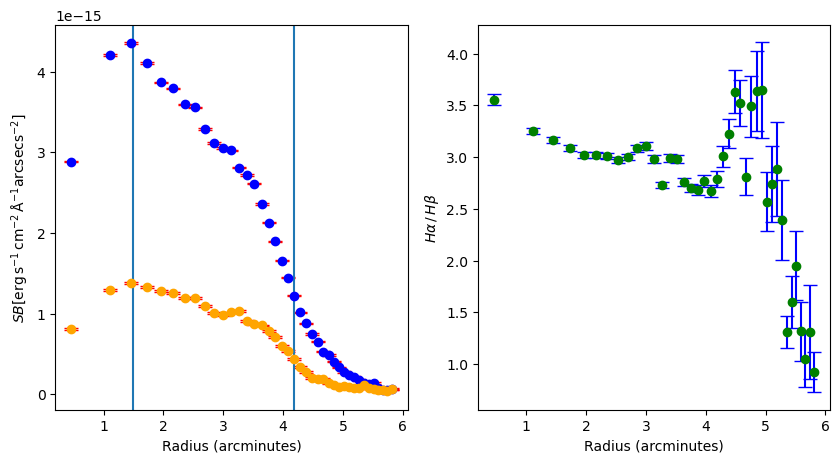

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

angular_size_pixel_TOBI_arcmin = 0.44 / 60 # arcmin per pixel
theta_r = np.array([(inner_r + outer_r) / 2 for inner_r, outer_r in annuli_radii]) * angular_size_pixel_TOBI_arcmin

ax[0].errorbar(theta_r, average_surface_brightness_Ha, yerr=sigma_surface_brightness_Ha, fmt='o', color='blue', 
             ecolor='red', capsize=5, linestyle='None')

ax[0].errorbar(theta_r, average_surface_brightness_Hb, yerr=sigma_surface_brightness_Hb, fmt='o', color='orange', 
             ecolor='red', capsize=5, linestyle='None')

ax[1].errorbar(theta_r, balmer_decrement, yerr=balmer_decrement_error, fmt='o', color='green', 
             ecolor='blue', capsize=5, linestyle='None')

ax[0].set_xlabel('Radius (arcminutes)')
ax[0].set_ylabel('$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$')

ax[1].set_xlabel('Radius (arcminutes)')
ax[1].set_ylabel('$H\\alpha\,/\,H\\beta$')

ax[0].axvline(x = 1.5)

# the cloud radius is defined as the place where the surface brightness drops of a factor 95%

print(average_surface_brightness_Ha[20]/max(average_surface_brightness_Ha))
print(theta_r[20])
ax[0].axvline(x = theta_r[20])

plt.show()

In [13]:
# Many radial profiles



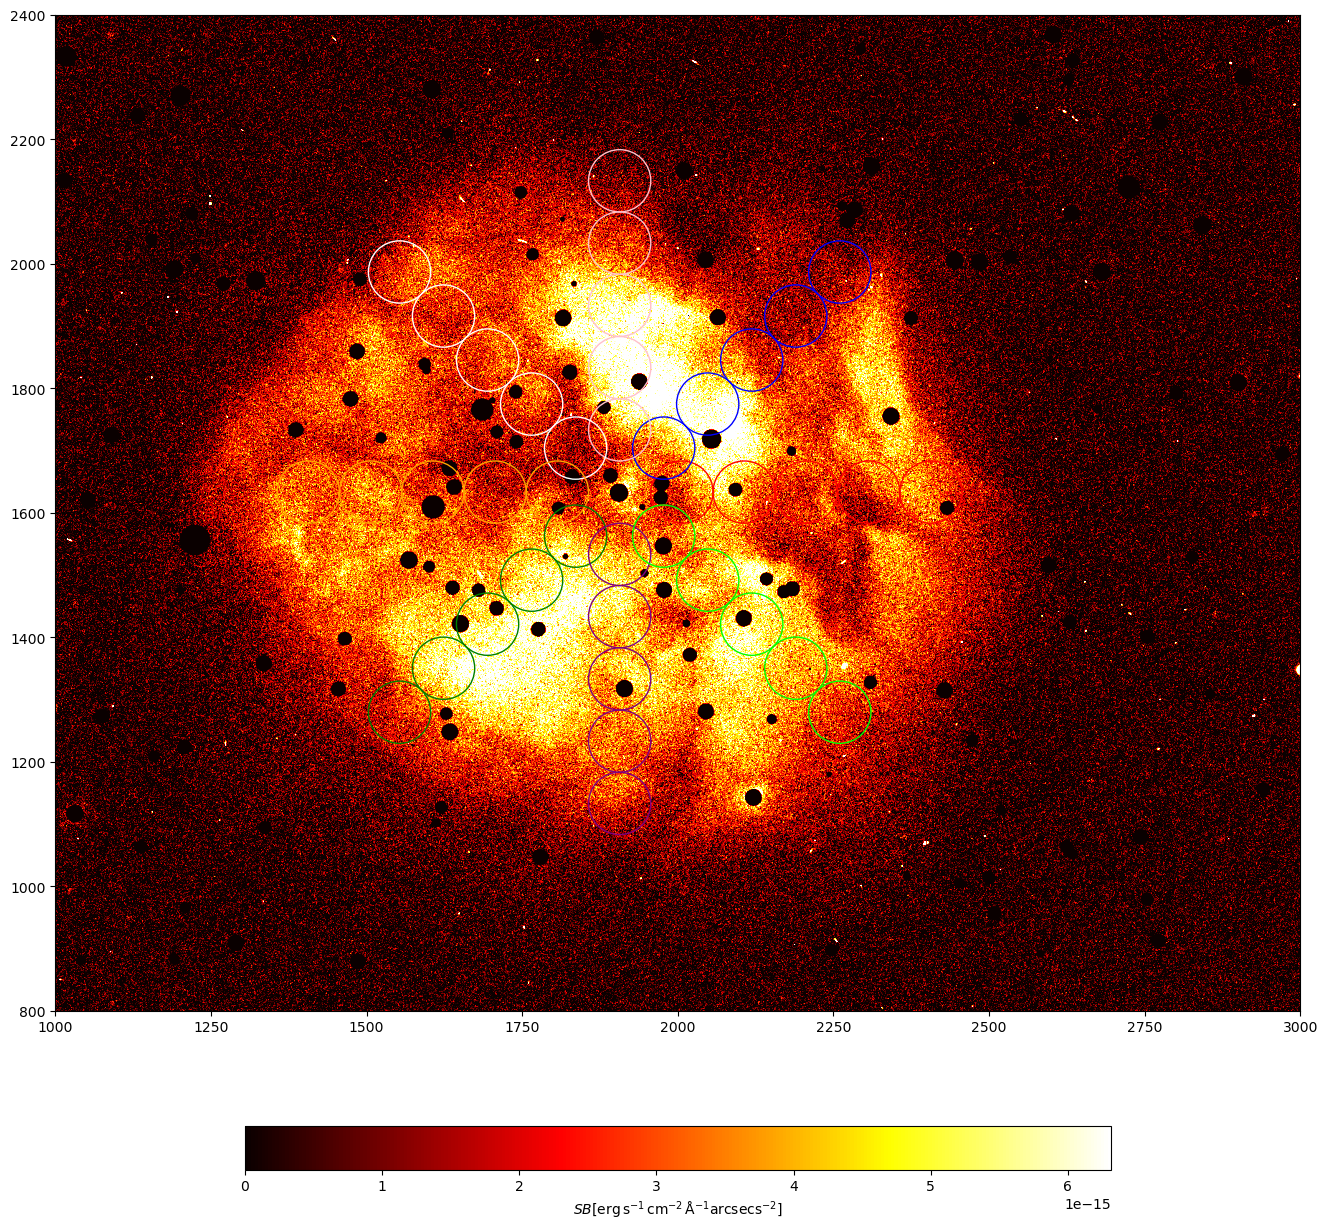

In [31]:
center_x, center_y = radec_to_xy(328.370134,47.266320) 

fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(masked_Ha, cmap=filter_cmap['Ha'],clim=[0, np.quantile(image['Ha'], 0.99)],origin='lower')
fig.colorbar(im,ax=ax,location='bottom', fraction=0.0375, pad=0.1, label="$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

center_x, center_y = radec_to_xy(328.370134,47.266320) 
ax.set_xlim(1000,3000)
ax.set_ylim(800,2400)

theta = [np.pi/4 * i for i in range(8)]
lines = []
colors = ['red','blue','pink','white','orange','green','purple','lime'] #'red','blue','pink','white','orange','green','purple','lime']
radius = 50
step = 100
r_array = np.array([step*i for i in range(1,6)])

# Average
from photutils.aperture import CircularAperture,aperture_photometry
from matplotlib.patches import Circle

for j,t in enumerate(theta):
    
    average_surface_brightness_Ha = []
    sigma_surface_brightness_Ha = []
    
    average_surface_brightness_Hb = []
    sigma_surface_brightness_Hb = []
    
    balmer_decrement = []
    balmer_decrement_error = []  

    v = np.array([np.cos(t),np.sin(t)])
    for i in range(1,6):

        c_x,c_y = center_x + v[0]*step*i, center_y + v[1]*step*i
        circle = CircularAperture((c_x,c_y), r = radius)
        area = np.pi*radius**2
        
        # Ha
        phot = aperture_photometry(masked_Ha, circle, error = np.full(masked_Ha.shape, sigma['Ha']))
        I_Ha = phot['aperture_sum'][0]
        Ha_err = phot['aperture_sum_err'][0]               # = sqrt(N) * sigma
        average_surface_brightness_Ha.append(I_Ha / area)
        sigma_surface_brightness_Ha.append(Ha_err / area)
    
        # Hb
        phot = aperture_photometry(masked_Hb, circle, error = np.full(masked_Hb.shape, sigma['Hb']))
        I_Hb = phot['aperture_sum'][0]
        Hb_err = phot['aperture_sum_err'][0]
        average_surface_brightness_Hb.append(I_Hb / area)
        sigma_surface_brightness_Hb.append(Hb_err / area)
    
        balmer_decrement.append(I_Ha/I_Hb)
        propagated_error = np.sqrt((Ha_err/I_Hb)**2 + (I_Ha/I_Hb**2 * Hb_err )**2)
        balmer_decrement_error.append(propagated_error)

        circle = Circle((c_x,c_y), radius=50, fill=False, linewidth=1, linestyle='-',color=colors[j])
        ax.add_patch(circle)


    lines.append([(average_surface_brightness_Ha, sigma_surface_brightness_Ha),
              (average_surface_brightness_Hb, sigma_surface_brightness_Hb),
              (balmer_decrement, balmer_decrement_error)])



[100 200 300 400 500]
[2.828141888569113e-15, 3.834866206282749e-15, 2.583696144340508e-15, 2.390532193506321e-15, 3.0718865701058e-15]


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

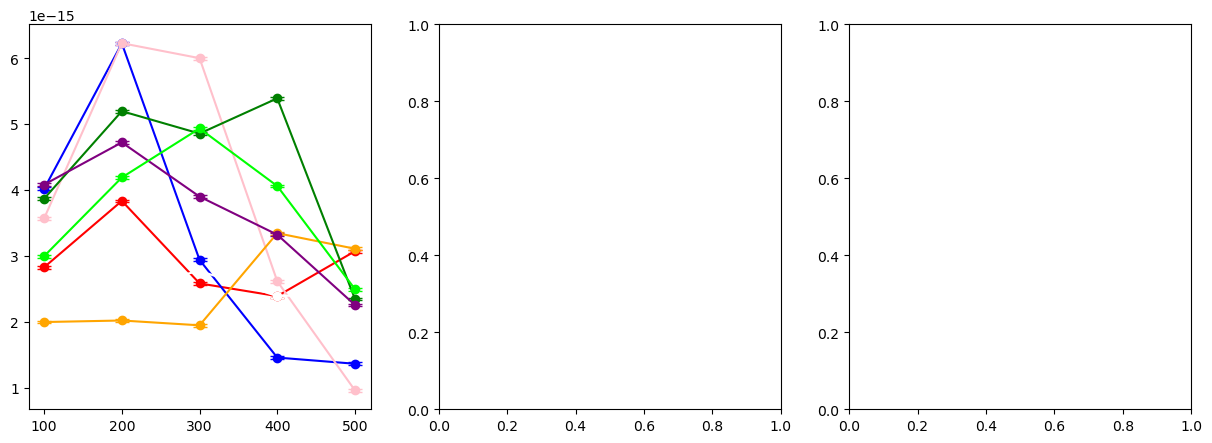

In [36]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
print(r_array)
print(lines[0][0][0])
r_array = np.array([step*i for i in range(1,6)])

for i in range(len(lines)):
    average_surface_brightness_Ha = lines[i][0][0]
    sigma_surface_brightness_Ha = lines[i][0][1]
    ax[0].errorbar(r_array, average_surface_brightness_Ha, yerr=sigma_surface_brightness_Ha, fmt='o', color=colors[i], 
             ecolor=colors[i], capsize=5,linestyle='-') # linestyle='None'
    


In [17]:
# MODELS

# phyisical constants
wavelength_Ha = 656.281e-7    # Ha line (cm)
h = 6.62607015e-27            # Planck's constant (erg·s)
c = 3.0e10                    # Speed of light (cm/s)

parsec = 3.086e18             # cm

T = 6500                                # electron temperature [K]
alpha_B = 2.59e-13 * (T / 1e4)**(-0.7)  # case B total recombination coefficient (cm^3/s) from Hummer & Storey (1987)
alpha_B_Ha = alpha_B * 1                # Recombination coefficient for Halpha ??

from scipy.integrate import quad
def SB_model(r, j, csi, sigma_dust, R_cloud, R_inner_void):
    
    s = np.where(r < R_inner_void, 
                 2 * R_cloud * np.sqrt(1 - (r / R_cloud) ** 2) - 2 * R_inner_void * np.sqrt(1 - (r / R_inner_void) ** 2),
                 2 * R_cloud * np.sqrt(1 - (r / R_cloud) ** 2))

    return j/(csi * sigma_dust * n_H) * (1-np.exp(-csi * sigma_dust * n_H * s))


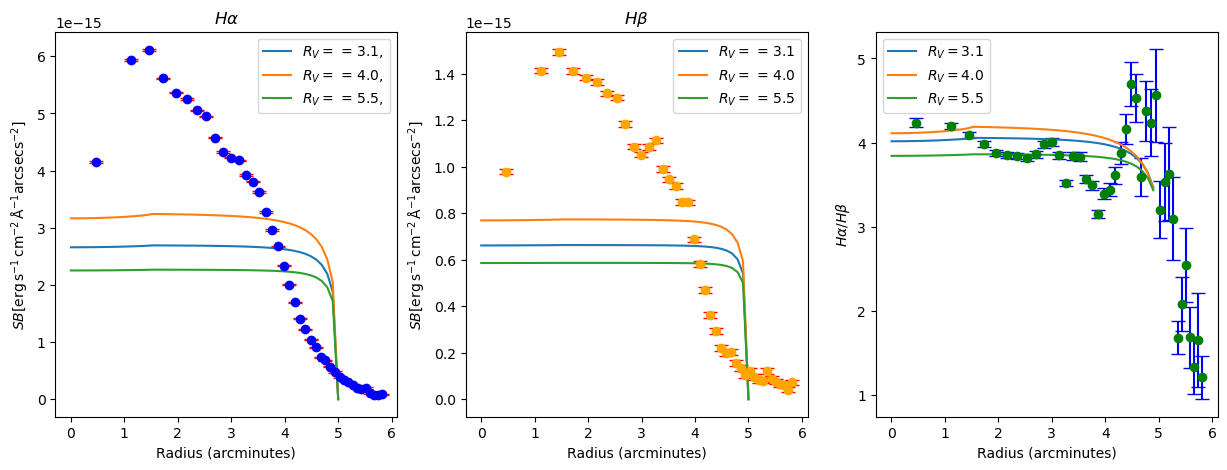

In [36]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

## PLOT MODELS

# cloud parameters
distance = 714 * parsec
n_H = 1e2                    # Hydrogen number density typical for HII region [cm^-3]
x = 0.1                      # ionized fraction
csi = 20                      # dust parameter

R_inner_void = 1.5 / 3437.75 * distance  # Radius of the innermost depleted region
R_cloud = 5 / 3437.75 * distance         # Stromgren radius

# emissivity
j_Ha = x**2 * n_H**2 * alpha_B_Ha * h*c / wavelength_Ha / 206265**2
j_Hb = j_Ha / 2.86

r_grid = np.linspace(0,R_cloud)
theta_r_grid = r_grid / distance * 3437.75

for rv in R_V:

    sigma_dust_H_Ha = dust_extinction[rv]['extinction_H_curve'](wavelength_Ha*1e4)
    sigma_dust_H_Hb = dust_extinction[rv]['extinction_H_curve'](wavelength_Hb*1e4)
    
    ax[0].plot(theta_r_grid, SB_model(r_grid, j_Ha, csi,sigma_dust_H_Ha, R_cloud, R_inner_void),label=rf"$R_V = $ = {rv}, ")
    ax[0].legend()

    ax[1].plot(theta_r_grid, SB_model(r_grid, j_Hb, csi,sigma_dust_H_Hb, R_cloud, R_inner_void),label=rf"$R_V = $ = {rv}")
    ax[1].legend()
    
    ax[2].plot(theta_r_grid, SB_model(r_grid, j_Ha, csi,sigma_dust_H_Ha, R_cloud, R_inner_void)/SB_model(r_grid, j_Hb, csi,sigma_dust_H_Hb, R_cloud, R_inner_void),
               label=f"$R_V = {rv}$") 
    ax[2].legend()

## PLOT DATA

angular_size_pixel_TOBI_arcmin = 0.44 / 60 # arcmin per pixel
theta_r = np.array([(inner_r + outer_r) / 2 for inner_r, outer_r in annuli_radii]) * angular_size_pixel_TOBI_arcmin

ax[0].errorbar(theta_r, average_surface_brightness_Ha, yerr=sigma_surface_brightness_Ha, fmt='o', color='blue', 
             ecolor='red', capsize=5, linestyle='None')

ax[1].errorbar(theta_r, average_surface_brightness_Hb, yerr=sigma_surface_brightness_Hb, fmt='o', color='orange', 
             ecolor='red', capsize=5, linestyle='None')

ax[2].errorbar(theta_r, balmer_decrement, yerr=balmer_decrement_error, fmt='o', color='green', 
             ecolor='blue', capsize=5, linestyle='None')

for i in range(3):
    ax[i].set_xlabel('Radius (arcminutes)')

ax[0].set_title('$H\\alpha$')
ax[0].set_ylabel('$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$')
ax[1].set_title('$H\\beta$')
ax[1].set_ylabel('$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$')

ax[2].set_ylabel('$H\\alpha/H\\beta$')


plt.show()


Filename: data/p387Dust.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (82, 82)   float64   


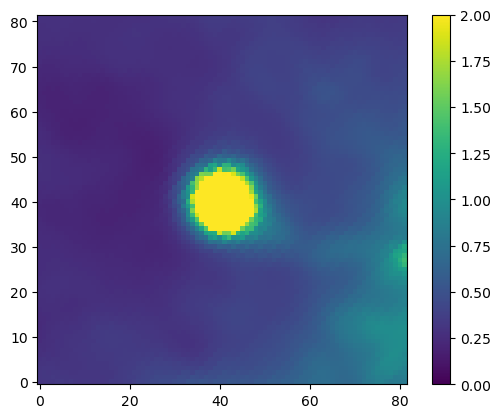

In [190]:
with fits.open("data/p387Dust.fits") as hdul:
    hdul.info()
    #if len(hdul) > 1:
    #    table_hdu = hdul[1]  
    dust_map_nasa = hdul[0].data

        #if table_hdu.data.ndim == 1:
        #    table = np.stack(table_hdu.data)

        #for row in table:
        #    stars_astrometry.append({'ra': row[0], 'dec': row[1], 'x': row[2], 'y': row[3]})
#clim=[0, np.quantile(dust_map_nasa, 0.99)]
plt.imshow(dust_map_nasa, clim=[0,2],cmap='viridis', origin='lower')
plt.colorbar()

In [ ]:
# central star 

In [ ]:
XP_SAMPLED-Gaia DR3 1974546106933956608.fits

In [ ]:
# Model 2. Optically thick? 

# Central star is BD+46 3474 (328.370134,47.266320) 
# https://simbad.u-strasbg.fr/simbad/sim-coo?&Coord=328.369092937714d47.259304681846d&CooFrame=FK5&Radius=2&Radius.unit=arcmin
#center_x, center_y = radec_to_xy(328.370134,47.266320) 





In [ ]:
# Does the central star saturates ? 

fig, ax = plt.subplots(1,2,figsize=(8,4))

from matplotlib.colors import LogNorm
im = ax[0].imshow(filtered_image, cmap=filter_cmap['Ha'],norm=LogNorm(vmin=1e-18, vmax=np.quantile(image['Ha'], 0.99999)),origin='lower')
plt.colorbar(im, ax = ax[0], location='bottom', fraction=0.0375, pad=0.1, label="$SB  [\\mathrm{erg\\, s^{-1}\\, cm^{-2}\\, \u00c5^{-1} arcsecs^{-2}}]$")

center_x, center_y = radec_to_xy(328.370134,47.266320) 
l = 30
ax[0].set_xlim(center_x-l,center_x+l)
ax[0].set_ylim(center_y-l,center_y+l)

rectangle = filtered_image[int(center_y-l):int(center_y+l), int(center_x-l):int(center_x+l)]
y, x = np.mgrid[:rectangle.shape[0], :rectangle.shape[1]]
g_init = models.Gaussian2D(amplitude=rectangle.max(), x_mean=l, y_mean=l, x_stddev=5, y_stddev=5)
fit = fitting.LevMarLSQFitter()
g_fit = fit(g_init, x, y, rectangle)
            
refined_x = center_x - l + g_fit.x_mean.value
refined_y = center_y - l + g_fit.y_mean.value

sigma_x, sigma_y = g_fit.x_stddev.value, g_fit.y_stddev.value
fwhm_x = 2.355 * sigma_x
fwhm_y = 2.355 * sigma_y
fwhm = (fwhm_x + fwhm_y) / 2

# For 1,2,3 fwhm
from matplotlib.patches import Circle
for i in range(1,4):
    circle = Circle((center_x, center_y), radius=i*fwhm, fill=False, linewidth=3, linestyle='-')  #
    ax[0].add_patch(circle)

# Create custom legend handles (for circles)
#handles = [Line2D([0], [0], color=colors[i], lw=3, linestyle = '-',label=f"${sigma_dust_arr[i]:.1e}$  ; {tau_arr[i]:.1f} ; {r/parsec:.2f}") for i, r in enumerate(stromgen_radius)]


#Check if the computed PSF and the empirical PSF agree 
# Empirical PSF

center_x, center_y = radec_to_xy(328.370134,47.266320) 
r = np.arange(0.1,30.1,1)
annuli_radii = [(r[i], r[i+1]) for i in range(len(r) - 1)]

# Average surface brightness in each annulus to get the PSF
from photutils.aperture import CircularAnnulus, aperture_photometry

surface_brightness_central_star = []
for inner_r, outer_r in annuli_radii:

    annulus = CircularAnnulus((center_x, center_y), r_in=inner_r, r_out=outer_r)
    
    phot = aperture_photometry(filtered_image, annulus, error = np.full(masked_image.shape, sigma[f]))
    annulus_flux = phot['aperture_sum'][0]
    annulus_flux_err = phot['aperture_sum_err'][0]
    area_annulus = np.pi * (outer_r**2 - inner_r**2)
    surface_brightness_central_star.append(annulus_flux / area_annulus)
    #sigma_surface_brightness.append(annulus_flux_err / area_annulus)

ax[1].scatter(r[:-1], surface_brightness_central_star/max(surface_brightness_central_star))

from scipy.stats import norm
x = np.linspace(0,30)
gaus_pdf = norm.pdf(x,loc=0, scale=g_fit.x_stddev.value)
ax[1].plot(x,gaus_pdf/max(gaus_pdf),c='red')

plt.show()